In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
'''
Categorical
'car_ID', 
'symboling', 
'CarName', # extract company name 
'fueltype',
'aspiration',
'doornumber',
'carbody',
'drivewheel', 
'enginelocation', 
'enginetype',
'cylindernumber', 
'fuelsystem', 

continuous
'wheelbase',
'carlength', 
'carwidth', 
'carheight', 
'curbweight',
'boreratio', #ratio between cylinder bore diameter and piston stroke length.
'stroke', 
'compressionratio', 
'horsepower', 
'peakrpm', 
'citympg', 
'highwaympg', 
'enginesize',
'''
print('columns ',df.columns) #show the dataframe columns

columns  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [ ]:
#find all unique values and couts from categorical attributes
print(df[['symboling', 'CarName', 'fueltype', 'aspiration','doornumber','carbody',
         'drivewheel', 'enginelocation', 'enginetype','cylindernumber',
         'fuelsystem']].apply(lambda col: col.unique()))

print(df[['symboling', 'CarName', 'fueltype', 'aspiration','doornumber','carbody',
         'drivewheel', 'enginelocation', 'enginetype','cylindernumber',
         'fuelsystem']].apply(lambda col: col.nunique()))

symboling                                      [3, 1, 2, 0, -1, -2]
CarName           [alfa-romero giulia, alfa-romero stelvio, alfa...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                          [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                 [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
cylindernumber         [four, six, five, three, twelve, two, eight]
fuelsystem           [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]
dtype: object
symboling           6
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem        

In [ ]:
df.isnull().sum() #total null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#split company name from carname
companyname = df['CarName'].apply(lambda x : x.split(' ')[0]) 
df['CarName'] = companyname
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#find all unique values from categorical attributes
print(df[['CarName']].apply(lambda col: col.unique()))

        CarName
0   alfa-romero
1          audi
2           bmw
3     chevrolet
4         dodge
5         honda
6         isuzu
7        jaguar
8         maxda
9         mazda
10        buick
11      mercury
12   mitsubishi
13       Nissan
14       nissan
15      peugeot
16     plymouth
17      porsche
18     porcshce
19      renault
20         saab
21       subaru
22       toyota
23      toyouta
24    vokswagen
25   volkswagen
26           vw
27        volvo


In [ ]:
# replacing misspelled comapny names
company_dict = {'alfa-romero' : 'alfa-romero',
              'audi' : 'audi',
              'bmw' : 'bmw',
              'chevrolet' : 'chevrolet',
              'dodge' : 'dodge',
              'honda' : 'honda',
              'isuzu' : 'isuzu',
              'jaguar' : 'jaguar',
              'maxda' : 'mazda',
              'mazda' : 'mazda',
              'buick' : 'buick',
              'mercury' : 'mercury',
              'mitsubishi' : 'mitsubishi',
              'Nissan' : 'nissan',
              'nissan' : 'nissan',
              'peugeot' : 'peugeot',
              'plymouth' : 'plymouth',
              'porsche' : 'porsche',
              'porcshce' : 'porsche',
              'renault' : 'renault',
              'saab' : 'saab',
              'subaru' : 'subaru',
              'toyota' : 'toyota',
              'toyouta' : 'toyota',
              'vokswagen' : 'vw',
              'volkswagen' : 'vw',
              'vw' : 'vw',
              'volvo' : 'volvo'
}

# map titles to category
df['CarName'] = df['CarName'].map(company_dict)

In [ ]:
print(df[['CarName']].apply(lambda col: col.unique()))
print(df[['CarName']].apply(lambda col: col.nunique()))

        CarName
0   alfa-romero
1          audi
2           bmw
3     chevrolet
4         dodge
5         honda
6         isuzu
7        jaguar
8         mazda
9         buick
10      mercury
11   mitsubishi
12       nissan
13      peugeot
14     plymouth
15      porsche
16      renault
17         saab
18       subaru
19       toyota
20           vw
21        volvo
CarName    22
dtype: int64


In [ ]:
df.loc[df.duplicated()] #duplicate values

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


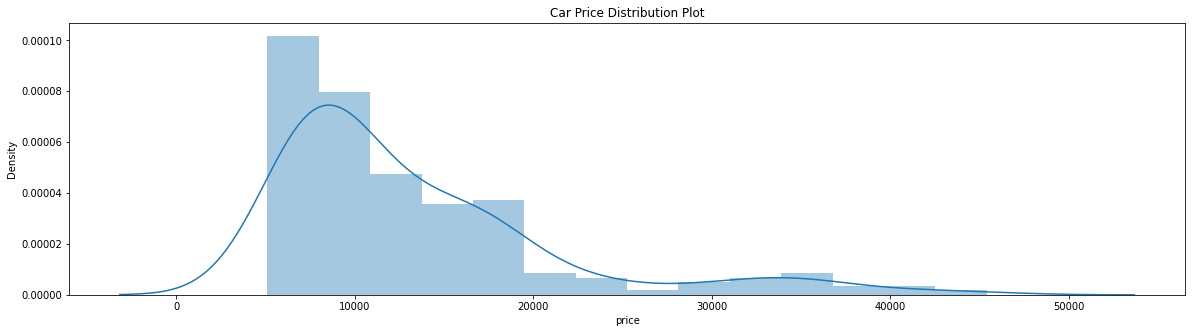

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

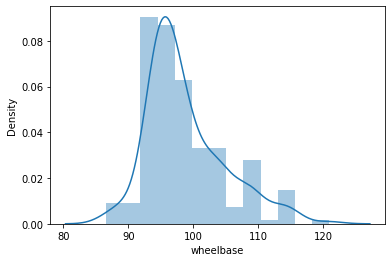

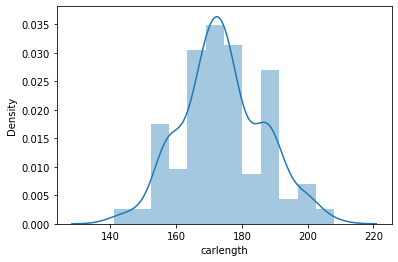

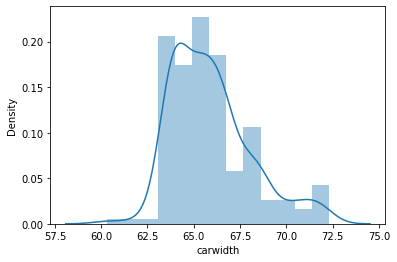

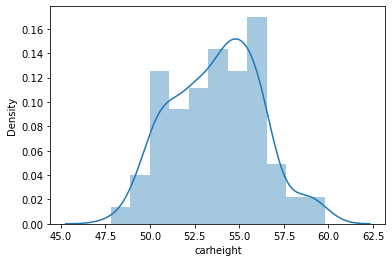

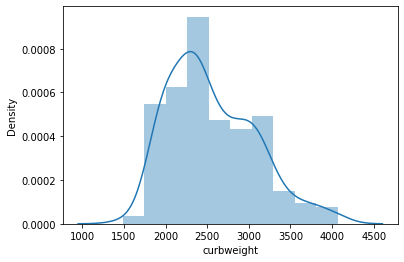

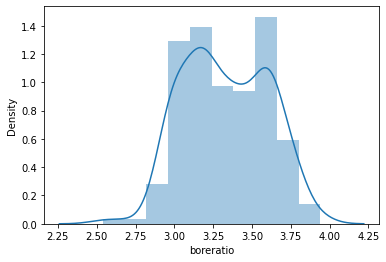

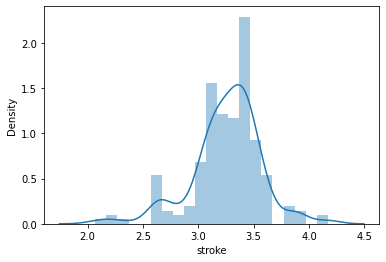

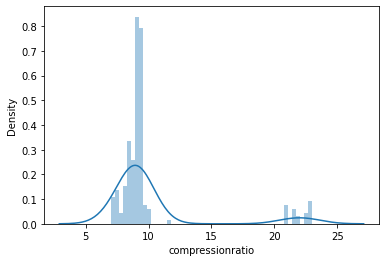

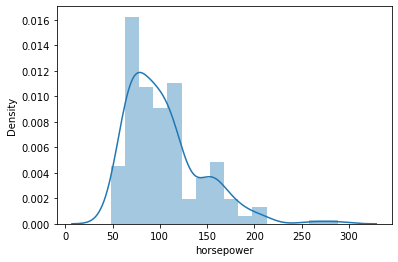

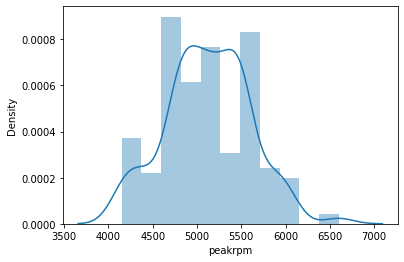

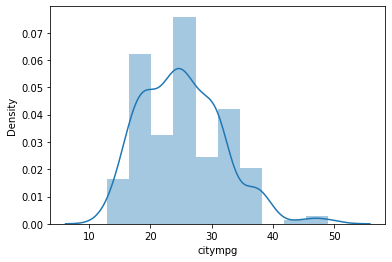

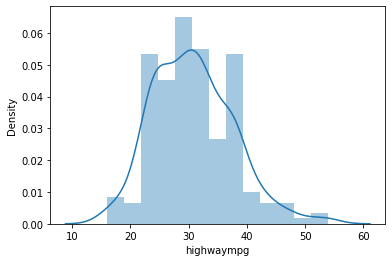

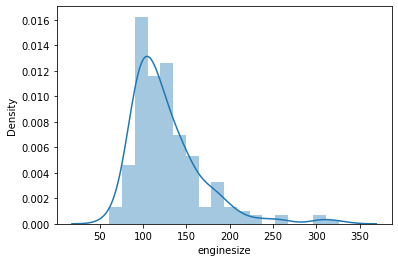

In [ ]:
#dist for numerical attributes
temp_df = df[['wheelbase',
             'carlength', 
             'carwidth',
             'carheight', 
             'curbweight',
             'boreratio', 
             'stroke',
             'compressionratio', 
             'horsepower', 
             'peakrpm', 
             'citympg', 
             'highwaympg', 
             'enginesize']]
for i, col in enumerate(temp_df.columns):
    plt.figure(i)
    sns.distplot(temp_df[col])

In [ ]:
'''
pearson's correlation
sum((current x value - mean of x) * (current y value - mean of y) / (sum(x- mean of x)^2 * sum(x- mean of x)^2)^1/2  
'''
temp_df.corr('pearson')

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,enginesize
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.569329
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.683360
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.735433
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.067149
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.850594
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.583774
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.203129
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.028971
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.809769
peakrpm,-0.360469,-0.287242,-0.220012,-0.320411,-0.266243,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.244660


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#standardization of numerical columns 
temp_df = df[['wheelbase','carlength','carwidth', 'carheight', 'curbweight',
              'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg','enginesize'
              ]]        
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# fit & transform data
scaled_data= scaler.fit(temp_df)
temp_df = scaled_data.transform(temp_df) #transform returns numpy array

In [ ]:
# convert numpy array to pandas dataframe
temp_df = pd.DataFrame(temp_df,columns=['wheelbase','carlength','carwidth', 'carheight', 'curbweight',
              'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg','enginesize'
              ])
print(temp_df)

     wheelbase  carlength  carwidth  ...   citympg  highwaympg  enginesize
0    -1.690772  -0.426521 -0.844782  ... -0.646553   -0.546059    0.074449
1    -1.690772  -0.426521 -0.844782  ... -0.646553   -0.546059    0.074449
2    -0.708596  -0.231513 -0.190566  ... -0.953012   -0.691627    0.604046
3     0.173698   0.207256  0.136542  ... -0.186865   -0.109354   -0.431076
4     0.107110   0.207256  0.230001  ... -1.106241   -1.273900    0.218885
..         ...        ...       ...  ...       ...         ...         ...
200   1.721873   1.198549  1.398245  ... -0.340094   -0.400490    0.339248
201   1.721873   1.198549  1.351515  ... -0.953012   -0.837195    0.339248
202   1.721873   1.198549  1.398245  ... -1.106241   -1.128332    1.109571
203   1.721873   1.198549  1.398245  ...  0.119594   -0.546059    0.435538
204   1.721873   1.198549  1.398245  ... -0.953012   -0.837195    0.339248

[205 rows x 13 columns]


In [ ]:
# drop non standardised columns 
df.drop(['wheelbase','carlength','carwidth', 'carheight', 'curbweight',
              'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg','enginesize'
              ], axis = 1,inplace = True)

In [ ]:
# add standardised columns to the dataframe
df = pd.concat([df,temp_df], axis=1)

In [ ]:
#remove outlier
def remove_outlier(my_column,temp_df):
  '''
  remove outliers from all columns
  find upper & lower limit for data points 
  delete outliers inplace    
  
  input: single column(pandas series)
         temp dataframe(pandas dataframe)
  return: None

     
  '''
  upper_limit_outlier = temp_df[my_column].mean() + (3*temp_df[my_column].std())
  lower_limit_outlier = temp_df[my_column].mean() - (3*temp_df[my_column].std())
  
  df.drop(df[df[my_column] > upper_limit_outlier].index, inplace = True)
  df.drop(df[df[my_column] < lower_limit_outlier].index, inplace = True)

for col in temp_df.columns:
    remove_outlier(col,df)

In [ ]:
#creating dummy variables for categorical attributes
label_list = ['symboling', 'CarName', 'fueltype', 'aspiration','doornumber',
              'carbody', 'drivewheel', 'enginelocation', 'enginetype',
              'cylindernumber', 'fuelsystem'
              ]
df = pd.get_dummies(df, columns = label_list)

In [ ]:
df.shape

(182, 77)

In [ ]:
df.isnull().sum() #total null values

car_ID             0
price              0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 77, dtype: int64

In [ ]:
df.head(1)

,car_ID,price,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,enginesize,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volvo,CarName_vw,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,13495.0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.26296,-0.646553,-0.546059,0.074449,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = df.drop('car_ID',axis=1)
target = df['price'] # target variable
df = df.drop('price',axis=1)

In [ ]:
#reducing number of dimensions
'''
PCA 
1)take mean of data

2)covariance matrix
diagonal values of matrix gives variance of variables 
cov(i,j) for each position in matrix (i,j are attributes)
cov() = sum( (x- mean of x) * (y- mean of y) )/ n-1 

3)eigen value eigen vector for cov matrix
4)total variance = addition of two eigen values
5)calculate % variance for each eigen vector 
6)sort vectors in decreasing order
7)eigenvectors with highest eigen value is principal component    
8)make projection matrix with these vectors 
9)multiply standardized dataset with projection matrix to get final prin comp
'''
# reducing dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=22)
df = pd.DataFrame(pca.fit_transform(df))

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.516728,2.389775,1.96108,1.702703,0.244959,0.464197,-0.136833,0.070461,-0.04362,0.73859,0.543486,0.364466,0.061214,-0.820126,0.577503,0.576892,-0.04297,-0.194462,1.357994,-0.083534,0.414398,0.428576


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.3, random_state = 10) #split

In [ ]:
'''
y = mx + c
Mean Square Error, Quadratic loss, L2 Loss (magnitude + direction)
Mean Absolute Error, L1 Loss(only magnitude of error)

Mean Squared Error function to calculate the loss
error = 1/n * sum(actual_value - pred_value)^2)
error = 1/n * sum(actual_value - (mx + c))^2)

gradient descent 
1)d_w = partial derivatives of error w.r.t m 
  d_c = partial derivatives of error w.r.t c

2)new m = m - L * d_w  
  new c = c - L * d_c
L is learning rate  
'''
from sklearn.linear_model import LinearRegression 
rg = LinearRegression()
rg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_rg = rg.predict(x_test) #predictions

In [ ]:
'''
r^2 coefficient of determination
1- (u/v)
u: residual sum of squares ((y_true - y_pred) ** 2).sum()
v: ((y_true - y_true.mean()) ** 2).sum()
'''
import sklearn.metrics as sm
print(sm.r2_score(y_test, y_pred_rg))

0.8985836373027155
